<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [306]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import pyplot
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import urllib

import datetime as dt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import arange

from yellowbrick.features import ParallelCoordinates
# use automatically configured the lasso regression algorithm
from sklearn.linear_model import LassoCV
import plotly.express as px
from sklearn import metrics
import urllib

#Create Pred Plots

In [246]:
def Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].set_ylim(0,3)
    ax[0].set_xlim(0,3)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')


    ax[1].scatter(y_test, y_pred_Test)
    ax[1].set_ylim(0,3)
    ax[1].set_xlim(0,3)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    return()

#PRINT METRICS

In [247]:
def Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test):
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_pred_Train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return()

# Plot box plots multiple runs

In [248]:
def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation:', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation:', np.std(Test_R2))

#Data



In [249]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


# Pre-Processing

In [250]:
data['covid'] = 0

In [251]:
data.at[39,'covid'] = 1

In [252]:
data["Quantity_adj"] = data['Quantity']

In [253]:
data.at[39,'Quantity_adj'] =  -1.303515

In [ ]:
#df.drop(columns=['B', 'C'])
data.drop(columns='Quantity')

In [255]:
data['date'] = pd.to_datetime(data['date'])

In [256]:

# Then convert from date type to ordinal
data['date']= data['date'].map(dt.datetime.toordinal)

## Get Feature List

In [257]:
feature_list = data.loc[: ,data.columns != 'Quantity_adj']

# Data Split

In [258]:
y = data['Quantity_adj']

In [ ]:
y

In [259]:
X = data.loc[: ,data.columns != 'Quantity_adj']

In [ ]:
X

# Lasso Regression

## Training and predicting

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,  random_state=5, shuffle=True )

https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

In [266]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [267]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [268]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.093 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.457 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-1.606 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.460 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.172 total time=   0.1s
[CV 1/5] END .................model__alpha=0.2;, score=-0.095 total time=   0.1s
[CV 2/5] END .................model__alpha=0.2;, score=-0.564 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.754 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.421 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.145 total time=   0.1s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.089 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [269]:
search.best_params_

{'model__alpha': 0.4}

In [270]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [271]:
importance = np.abs(coefficients)

In [272]:
importance

array([0.        , 0.14749249, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [273]:
feature_list

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,covid
0,736330,1.503548,0.699923,112579.429700,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,8.970635e+05,9.131904e+05,194276.020000,502084.833000,171559.966500,45269.587500,0.0694,14753.347840,206242.568000,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.283417e+06,549789.00000,1.454672e+06,4.941982e+06,531850.19260,7.315236e+06,6.120086e+06,8.140200e+06,3.814229e+06,632387.59210,1.627959e+06,4.068021e+06,438682.26790,6.513619e+06,6.137144e+06,6.675101e+06,2.989981e+06,483448.34730,1.298812e+06,3.106784e+06,386289.55250,4.875376e+06,4.791147e+06,5.996089e+06,3.013613e+06,470541.32900,1.093819e+06,1,5,25,0
1,736361,0.076213,0.316156,113438.094900,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1.025705e+06,1.007968e+06,228359.839000,530826.162500,199731.695000,49050.602500,0.0678,14753.347840,206242.568000,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,7.930536e+06,4.347165e+06,677598.18360,1.864167e+06,4.353892e+06,433679.77720,5.854576e+06,4.445891e+06,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.283417e+06,549789.00000,1.454672e+06,4.941982e+06,531850.19260,7.315236e+06,6.120086e+06,8.140200e+06,3.814229e+06,632387.59210,1.627959e+06,4.068021e+06,438682.26790,6.513619e+06,6.137144e+06,6.675101e+06,2.989981e+06,483448.34730,1.298812e+06,0,4,24,0
2,736389,-1.346258,-0.267695,114667.258700,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1.099920e+06,1.083268e+06,241130.455500,568447.488000,218640.360000,55049.927400,0.0665,14753.347840,206242.568000,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,6.258157e+06,3.447128e+06,478975.79220,1.302861e+06,5.430242e+06,555441.90440,7.916687e+06,6.566090e+06,7.930536e+06,4.347165e+06,677598.18360,1.864167e+06,4.353892e+06,433679.77720,5.854576e+06,4.445891e+06,6.402426e+06,3.390803e+06,550883.07390,1.302565e+06,4.680431e+06,460632.00000,5.702443e+06,4.657354e+06,7.012296e+06,3.2

In [275]:
np.array(feature_list)[importance > 0]

IndexError: ignored

ValueError: ignored

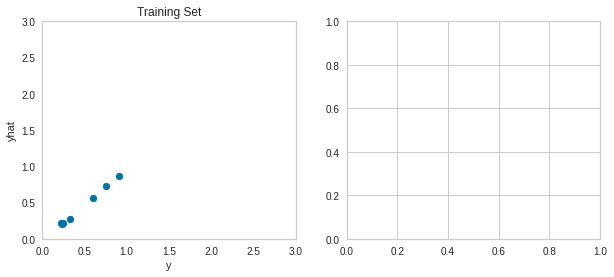

In [279]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)

In [280]:
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Training Metrics:
R squared: 0.9965411438429727
Mean Absolute Error: 0.03211268287828471
Mean Squared Error: 0.0014567536395234996
Root Mean Squared Error: 0.0381674421401736

Testing Metrics:


ValueError: ignored

ValueError: ignored

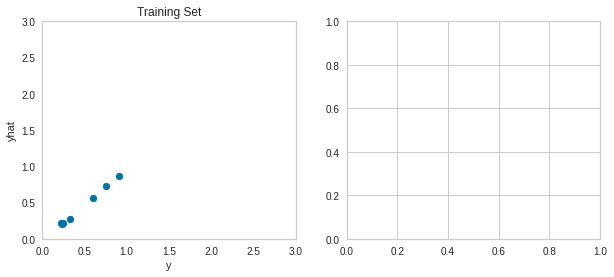

In [278]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

In [ ]:
##Parameter Settingsn

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20]

alphas = 10**np.linspace(10,-2,100)*0.5 #create alpha coefficients #More values

LassoReg = Lasso(normalize=True) #Define ridge model
MSE = [] #Store MSE values

for a in alphas:
    LassoReg.set_params(alpha = a)
    LassoReg.fit(X_train, y_train)
    y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
    MSE.append(metrics.mean_squared_error(y_train, y_pred_Train)) 

plt.plot(alphas,MSE)
plt.grid()
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.xlim(0,1)

Train MSE median: 2.2595549342163672e-10
Test MSE median: 0.9279443468968307

Train_R2 median: 0.9999999996768909
Test_R2 median: -0.5023462238677224


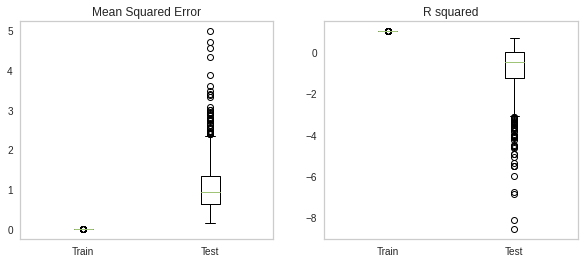

Train MSE standard deviation: 6.513190872196058e-11
Test MSE standard deviation: 0.613751285514861

Train_R2 standard deviation: 9.185435685362976e-11
Test_R2 standard deviation: 1.171313765638218


In [229]:
Multiple_Runner(Lasso(alpha = 0.01), X, y)

In [ ]:
XXXXXXXXXXXXXXX

In [ ]:
'''
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [ ]:
LassoReg = StandardScaler()

In [ ]:
LassoReg.fit(X_train, y_train)

In [ ]:
#LassoReg = Lasso()

In [ ]:
'''
# Fit the lasso regression
#LassoReg = LassoReg.fit(X, y)
LassoReg = LassoReg.fit(X, y)

In [ ]:
search.best_params_ #0.2

In [ ]:
y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model

In [ ]:
print('Intercept:',LassoReg.intercept_)
print('Coefficients:', LassoReg.coef_)

In [ ]:
print(LassoReg.intercept_)

In [ ]:
print(LassoReg.coef_)

In [ ]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

In [ ]:
##Parameter Settingsn

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20]

alphas = 10**np.linspace(10,-2,100)*0.5 #create alpha coefficients #More values

LassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso())
MSE = [] #Store MSE values

for a in alphas:
    LassoReg.set_params(a)
    LassoReg.fit(X_train, y_train)
    y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
    MSE.append(metrics.mean_squared_error(y_train, y_pred_Train)) 

plt.plot(alphas,MSE)
plt.grid()
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.xlim(0,1)

In [ ]:
#from sklearn.pipeline import make_pipeline

#model = make_pipeline(StandardScaler(with_mean=False), Lasso())

In [ ]:
##Parameter Settingsn

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20]

alphas = 10**np.linspace(10,-2,100)*0.5 #create alpha coefficients #More values

LassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso())
MSE = [] #Store MSE values

for a in alphas:
    #LassoReg.set_params(alpha = a)
    LassoReg.fit(X_train, y_train)
    y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
    MSE.append(metrics.mean_squared_error(y_train, y_pred_Train)) 

plt.plot(alphas,MSE)
plt.grid()
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.xlim(0,1)

# R2 Box Plot

In [ ]:
Multiple_Runner(Lasso(alpha = 0.2), X, y) # {'model__alpha': 0.2}

# Pipeline Scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

LassoReg = Lasso(normalize=True, alpha = 0.1)  #Default value for alpha = 1
LassoReg = make_pipeline(StandardScaler(with_mean=False))
LassoReg.fit(X_train, y_train)

y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model

#print('Intercept:' LassoReg.intercept_)
#print('Coefficients:' LassoReg.coef)

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(X_train,y_train)

In [ ]:
search.best_params_

# Me doing o3b Multi Linear Regress

# Lib

In [326]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import urllib

In [327]:
Adv= pd.read_csv('/content/02 Advertising.csv')
Adv.head(2)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


Create prediction plots

In [328]:
def Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].set_ylim(0,25)
    ax[0].set_xlim(0,25)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')


    ax[1].scatter(y_test, y_pred_Test)
    ax[1].set_ylim(0,25)
    ax[1].set_xlim(0,25)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    return()

Print Metrics


In [329]:
def Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test):
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_pred_Train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return()

Plot multiple Box Plots

In [330]:
def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation:', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation:', np.std(Test_R2))

## Data Split

Separating features and labels

In [333]:
feature_cols = ['TV','radio', 'newspaper'] #Column names
X = Adv[feature_cols] # Features
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [332]:
y = Adv.iloc[:,-1] # Labels
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

# Linear Regression

## Break data in training and testing

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(140, 3)
(60, 3)


### Model Creation

In [340]:
from sklearn import linear_model

In [341]:
LinearReg = linear_model.Lasso(alpha=0.1)

In [344]:
LinearReg.fit(X_train, y_train) #Train the model

Lasso(alpha=0.1)

In [345]:
y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

In [346]:
print('Intercept:',LinearReg.intercept_)
print('Coefficients:', LinearReg.coef_)

Intercept: 2.9839163192961085
Coefficients: [ 0.04667748  0.18441088 -0.00120038]


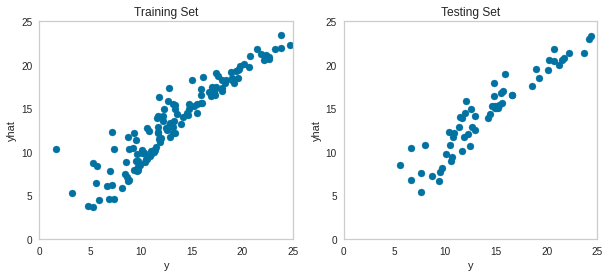

Training Metrics:
R squared: 0.8997650769323735
Mean Absolute Error: 1.2596938104407454
Mean Squared Error: 2.925577973925833
Root Mean Squared Error: 1.7104321015245922

Testing Metrics:
R squared: 0.8868072690506592
Mean Absolute Error: 1.2165974404880069
Mean Squared Error: 2.5060653679449714
Root Mean Squared Error: 1.5830557058881318


()

In [347]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 2.8234646147134033
Test MSE median: 2.7212358343022336

Train_R2 median: 0.8965847860745508
Test_R2 median: 0.8947100096534809


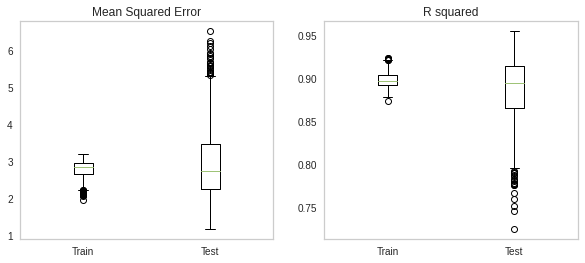

Train MSE standard deviation: 0.24013776230442607
Test MSE standard deviation: 1.003732574127274

Train_R2 standard deviation: 0.008557053774057242
Test_R2 standard deviation: 0.036374841094646816


In [348]:
Multiple_Runner(LinearRegression(), X, y)

# Differnt Tutorial

https://towardsdatascience.com/intro-to-regularization-with-ridge-and-lasso-regression-with-sklearn-edcf4c117b7a

In [318]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [319]:
data['covid'] = 0
data.at[39,'covid'] = 1
data["Quantity_adj"] = data['Quantity']
data.at[39,'Quantity_adj'] =  -1.303515
data.drop(columns='Quantity')
data['date'] = pd.to_datetime(data['date'])

In [320]:
features = data.loc[: ,data.columns != 'Quantity_adj']

In [321]:
y = data['Quantity_adj']

In [322]:
X = data.loc[: ,data.columns != 'Quantity_adj']

Lasso and LassoCV are imported in the same way. We will find the best value of alpha using CV:

In [323]:
from sklearn.linear_model import Lasso, LassoCV

In [325]:
LassoReg = LassoCV(cv=5, random_state=0).fit(X, y)

TypeError: ignored